**<h3><center>EN2550 Assignment 1</center></h3>**
*Name - Abeysinghe W.A.M.S.Y*
<br>
*Index no - 190014F*
<br>
Github - https://github.com/Yolty/Assignment-1
<br>

**Q1**

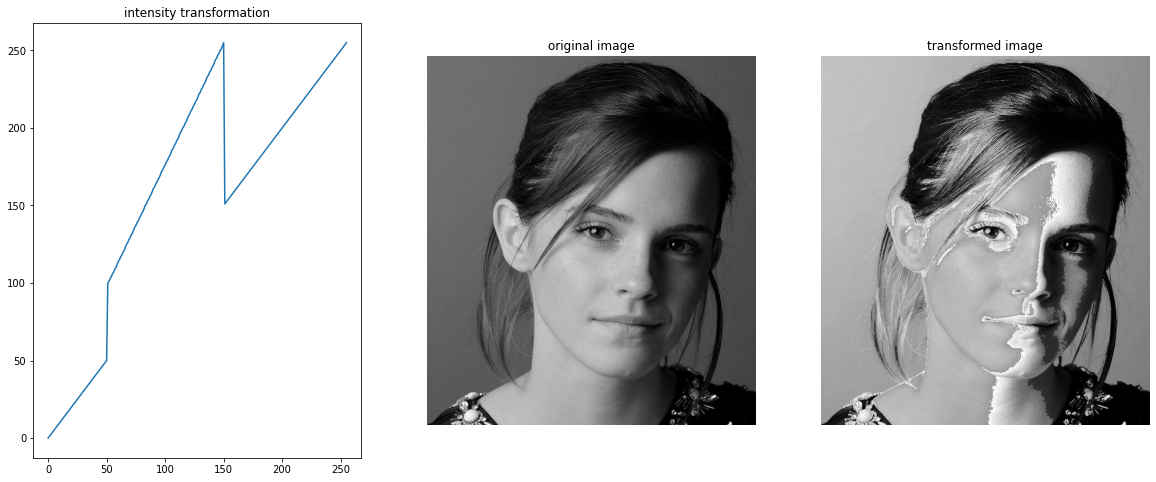

In [69]:
f = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)
t1 = np.linspace(0,50,51)
t2 = np.linspace(51,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(255,150,0)
t5 = np.linspace(151,255,105)
t = np.concatenate((t1,t2,t3,t4,t5), axis=0).astype(np.uint8)
g = cv.LUT(f, t)

Here as we can see, the given intensity transformation has kept the intensity values (0,50) and (151,255) unchanged. That means the darkest and the brightest pixels are unchanged. But the pixels with middle brightness are assigned to higher output intensities. So we can see that the darker tones like hair, pupils, and clothing and the brighter pixels like the skin have unchanged. But the pixels with intermediate values like that of the shadowed regions have turned lighter than before. 

**Q2(a)**

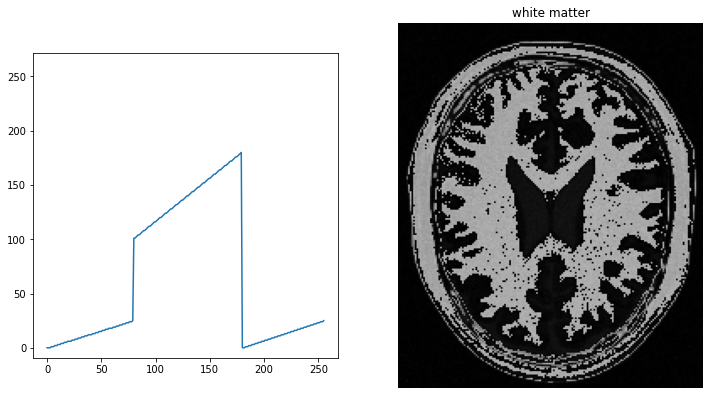

In [48]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
t1 = np.linspace(0,25,80)
t2 = np.linspace(26,100,0)
t3 = np.linspace(101,180,100)
t4 = np.linspace(0,25,76)
t = np.concatenate((t1,t2,t3,t4), axis=0).astype(np.uint8)
g = cv.LUT(f, t)

White matter areas generally have values in the range (80,180). To highlight those areas, we assign those pixels to brighter values and map the other pixels to lower intensity values to make them darker. 

**Q2(b)**

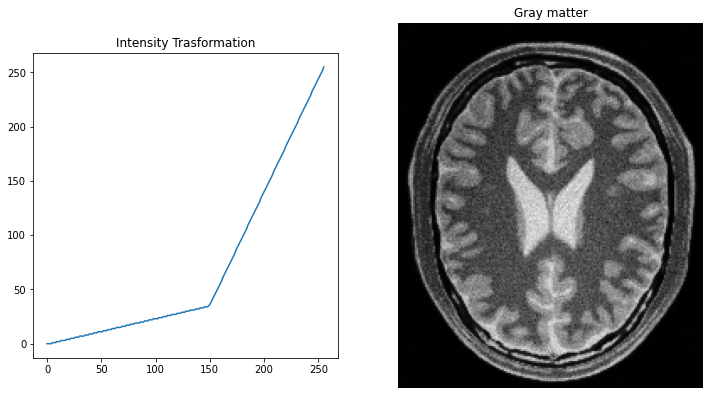

In [71]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
t1 = np.linspace(0,35,150)
t2 = np.linspace(36,255,106)
t = np.concatenate((t1,t2), axis=0).astype(np.uint8)
g = cv.LUT(f, t)

Generally, the gray matter is contained in pixels with higher intensity values. So to accentuate them, we assign the brighter pixels to brighter values and darker pixels to darker values. This makes brighter gray matter areas appear more highlighted. 

**Q3**

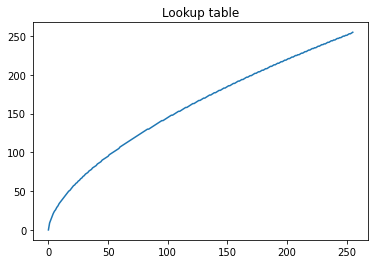

Gamma = 0.6


In [72]:
f = cv.imread(r'highlights_and_shadows.jpg',cv.IMREAD_COLOR)
original = cv.cvtColor(f,cv.COLOR_BGR2RGB)
lab = cv.cvtColor(f,cv.COLOR_BGR2Lab)
L, a, b = cv.split(lab)
gamma = 0.6
t = np.array([(p/255.0)**(gamma)*255.0 for p in range (0,256)]).astype('uint8')
print("Gamma =", gamma)

**Q3(b)**

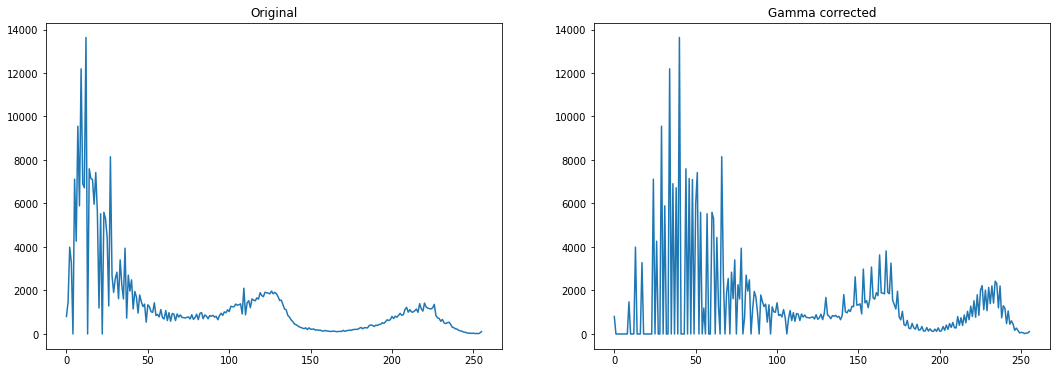

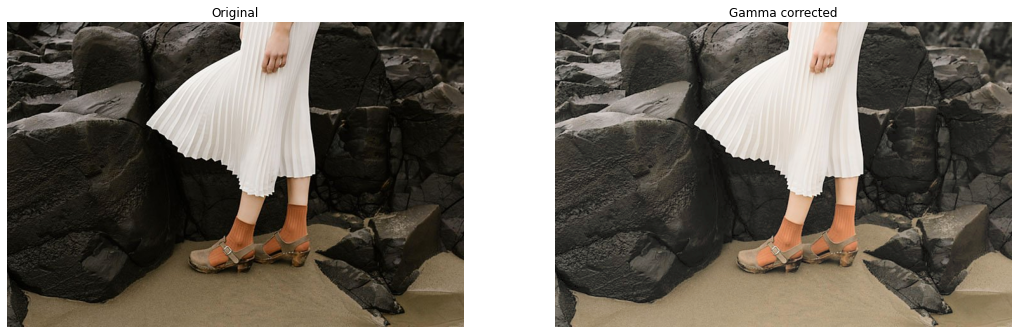

In [73]:
g = cv.LUT(L, t)
lab_orig = cv.cvtColor(f,cv.COLOR_BGR2Lab)
lab[:,:,0] = g
img = cv.cvtColor(lab, cv.COLOR_Lab2RGB).astype('uint8')
hist_original = cv.calcHist([lab_orig],[0],None,[256],[0,256])
hist_gamma = cv.calcHist([lab],[0],None,[256],[0,256])

To gamma correct the image, we increase the overall lighting while increasing the intensity of the darker areas by a higher value than that of the darker areas. So the image becomes brighter while darker places are becoming more apparent. There are more visible details in the darker rock regions of the corrected image. For this, we converter the image into Lab color space, and we use the L – Lightness attribute to change the intensity values. 

**Q4**

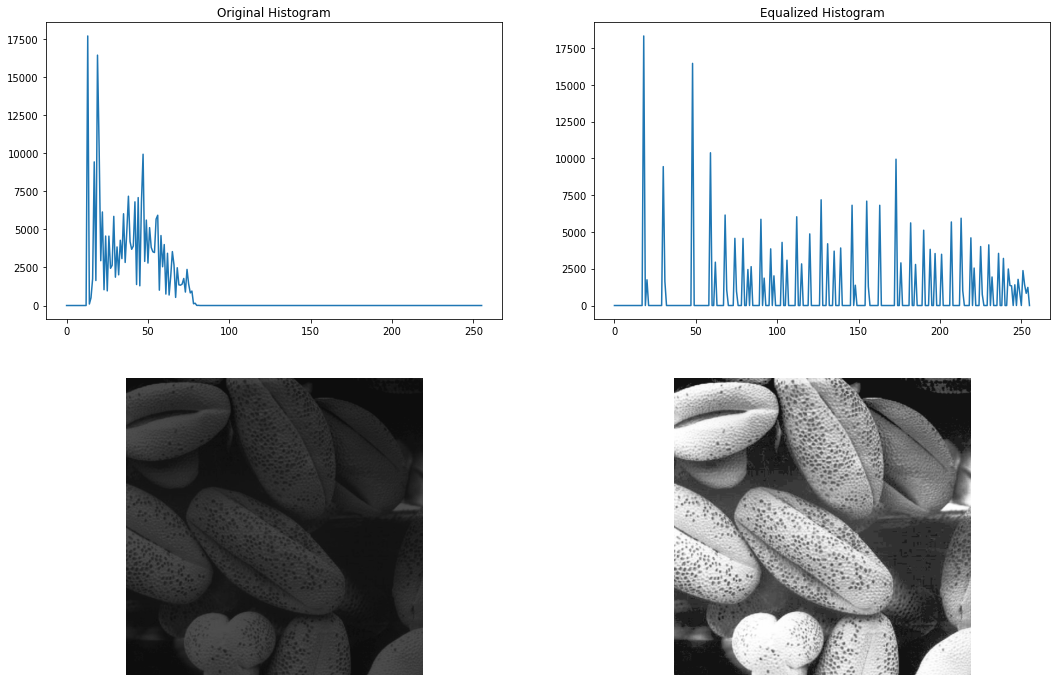

In [3]:
def Calc_hist(im):
    count = np.zeros(256)
    for i in range (im.shape[1]):
        for j in range(im.shape[0]):
            count[im[i][j]] += 1.
    return(count)

def equalize(f):
    height,width = f.shape
    hist = Calc_hist(f)

    cdf = hist[:]
    for i in range(len(cdf)):
        if i==0:
            continue
        else:
            cdf[i] += cdf[i-1] 

    normalized = cdf*255/(height*width)

    g = cv.LUT(f,normalized).astype('uint8')
    eq_hist = Calc_hist(g)

f = cv.imread(r'shells.png',cv.IMREAD_GRAYSCALE)
equalize(f)

In histogram equalization, we adjust the contrast of an image so that the program can efficiently use the total intensity range to show a clear image. As shown in the original histogram, the original image only uses darker pixels. We stretch this histogram to [0,255] range by using the equation, 
 $$\frac{CDF*255}{Total\,No.\,of\,Pixels}$$

**Q5(a)**

In [4]:
def zoom(f):
  s=4
  rows, cols = f.shape[0]*s , f.shape[1]*s
  zoomed = np.zeros((rows,cols,3))
  for i in range(rows):
    for j in range(cols):
      zoomed[i][j] = f[min(f.shape[0]-1,round(i/s))][min(f.shape[1]-1,round(j/s))]
  zoomed = zoomed.astype('uint8')
  return zoomed

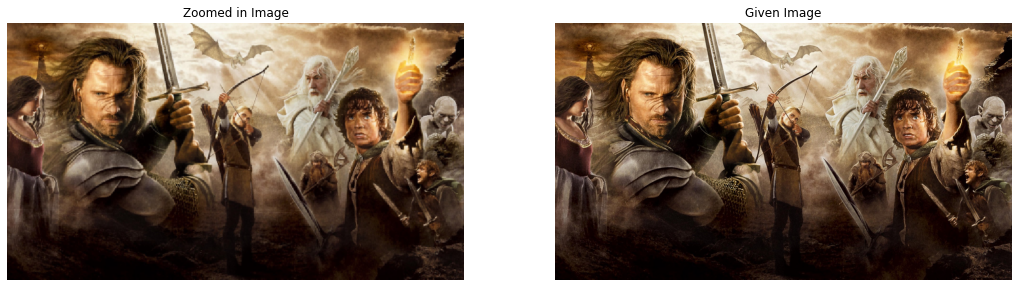

In [5]:
f = cv.imread(r'im01small.png',cv.IMREAD_COLOR)
g = cv.imread(r'im01.png',cv.IMREAD_COLOR)
zoomed = zoom(f)
s = np.sum((g[:,:,0:3]-zoomed[:,:,0:3])**2)/(zoomed.shape[0]*zoomed.shape[1]*zoomed.shape[2])

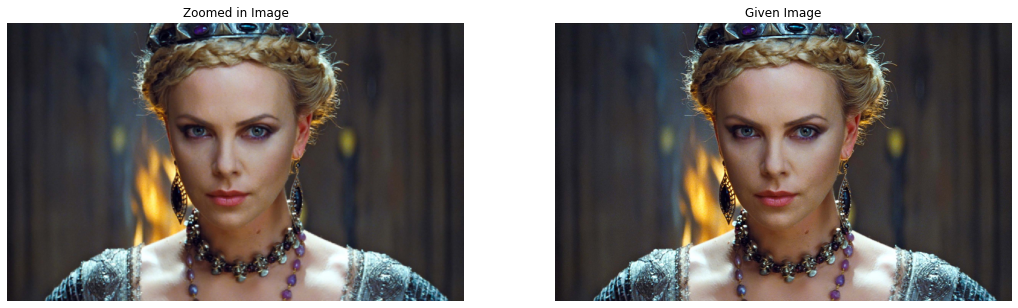

In [7]:
Same code as above.

In this method, we first create an array of the length of the desired image. Then these pixels were mapped to the pixels of the original image. This mapping is done so that the resulting image is seen as zoomed. For example, if we want to zoom the image by N times, we assign the pixel at the Xth place of the original image to the pixel at the X/N th place in the final image. Since this can result in float values, we then use the rounding of the property to take integer outputs. Finally, the image is clipped to original images dimensions to avoid the pixels with nonexisting values. 

**Q5(b)**

In [56]:
def zoom_b(f):
  s=4
  rows, cols = f.shape[0]*s , f.shape[1]*s

  zoomed = np.zeros((rows,cols,3))
  for i in range(rows):
    for j in range(cols):
      frac_x = i/s
      frac_y = j/s
      floor_x = math.floor(frac_x) 
      floor_y = math.floor(frac_y)
      ceil_x = math.ceil(frac_x) 
      ceil_y = math.ceil(frac_y)
      q1 = f[floor_x][floor_y]
      q2 = f[min(ceil_x,f.shape[0]-1)][floor_y]
      q3 = f[floor_x][min(ceil_y,f.shape[1]-1)]
      q4 = f[min(floor_x,f.shape[0]-1)][min(ceil_y,f.shape[1]-1)]
      r1 = q1*(frac_x - floor_x) + q2*(1 - frac_x + floor_x)
      r2 = q3*(frac_x - floor_x) + q4*(1 - frac_x + floor_x)
      r3 = r1*(frac_y - floor_y) + r2*(1 - frac_y + floor_y)

      zoomed[i,j,:] = r3
  return zoomed.astype(np.uint8)

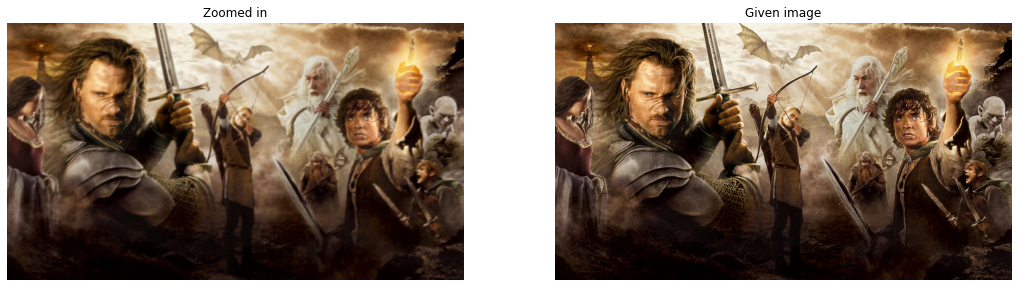

In [57]:
f = cv.imread(r'im01small.png',cv.IMREAD_COLOR)
g = cv.imread(r'im01.png',cv.IMREAD_COLOR)
zoomed = zoom_b(f)
s = np.sum((g[:,:,0:3]-zoomed[:,:,0:3])**2)/(zoomed.shape[0]*zoomed.shape[1]*zoomed.shape[2])

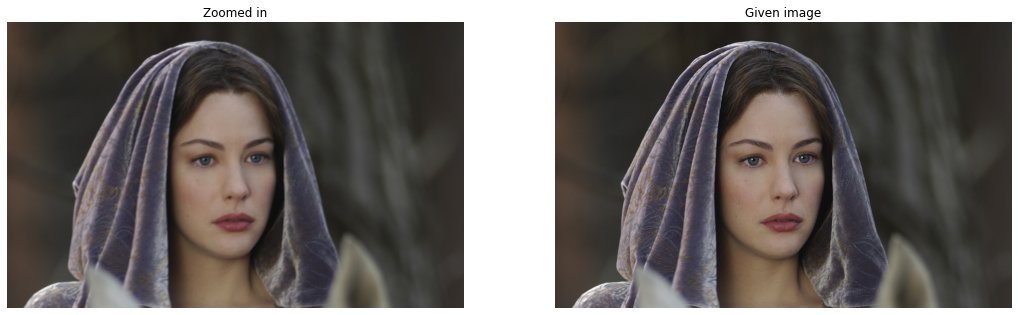

In [58]:
Same code as above.

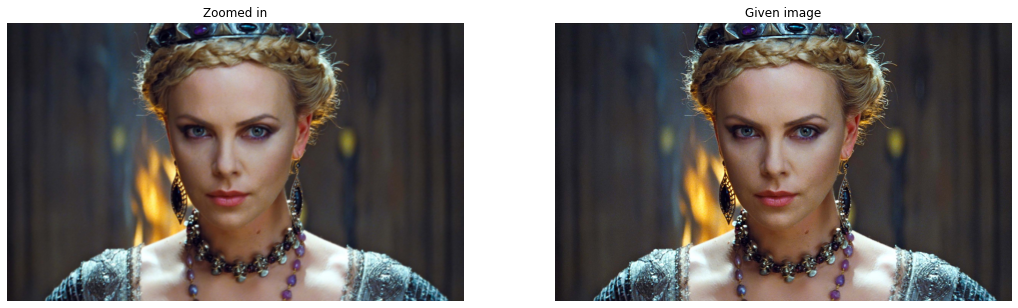

In [59]:
Same code as above.

In bilinear interpolation, the pixel mapping is not done directly. Here the 4 pixels that are located neighboring to a pixel in the required image are considered. The RGB value for a pixel in the zoomed-in image is guessed using the bilinear interpolation of the 4 pixels we considered before. 

**Q6(a)**

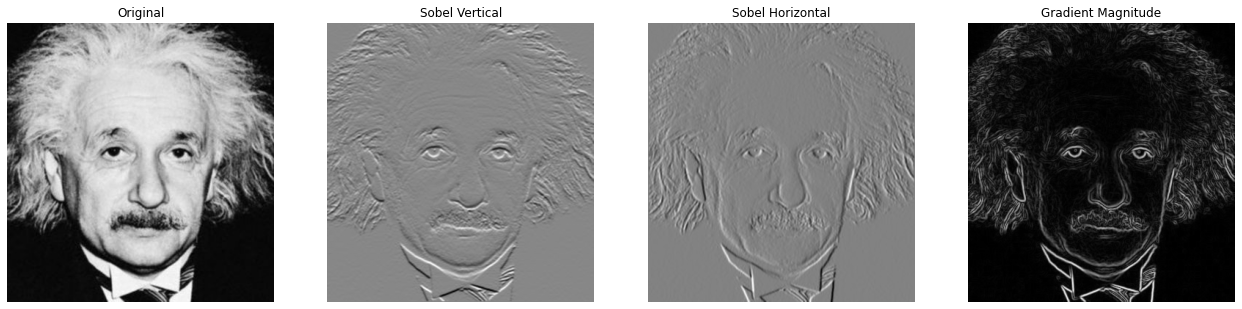

In [60]:
f = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype='float')
f_x = cv.filter2D(f, -1, sobel_v)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype='float')
f_y = cv.filter2D(f, -1, sobel_h)
grad = np.sqrt(f_x**2 + f_y**2)

Sobel kernels are used to detect an image’s vertical and horizontal edges. Here the kernels are custom made to accentuate the vertical and horizontal lines. Then these made kernels are 2D convoluted with the original painting using the filter2D. Finally, the vertical and horizontal edges are combined in one image to make a clear image with all the edges. 

**Q6(b)**

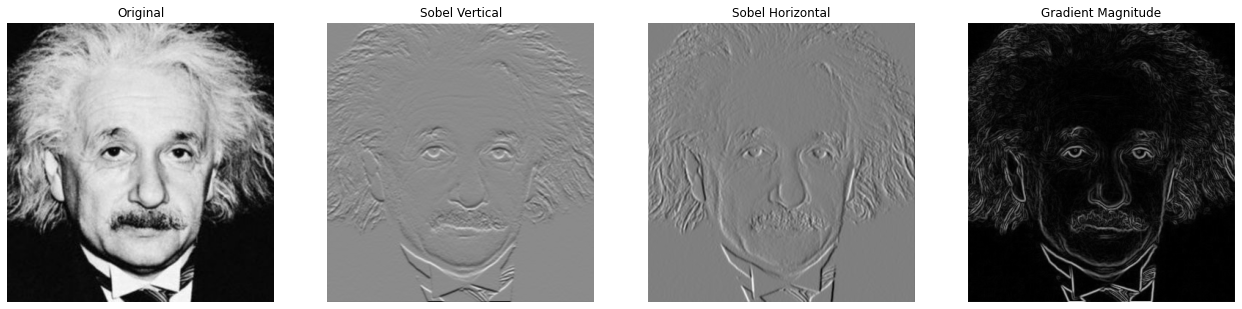

In [61]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

f = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
rows, cols = f.shape[0] , f.shape[1]
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype='float')
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype='float')
grad = np.sqrt(f_x**2 + f_y**2)
padded = np.zeros((rows+2,cols+2))
for i in range(rows):
    for j in range(cols):
        padded[i+1,j+1] = f[i,j]
f_x = convolution2d(padded, sobel_v)
f_y = convolution2d(padded, sobel_h)
grad = np.sqrt(f_x**2 + f_y**2)

The difference in this part is we are manually implementing the above-mentioned process by padding the image beforehand with zeros. 

**Q6(c)**

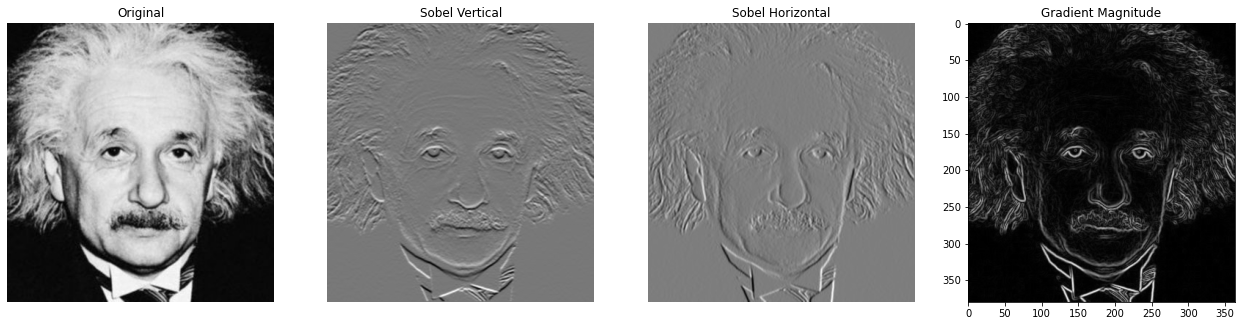

In [62]:
f = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
sobel_h1 = np.array([[1],[2],[1]], dtype='float')
sobel_h2 = np.array([[1,0,-1]],dtype='float')
sobel_v1 = np.array([[-1],[0],[1]], dtype='float')
sobel_v2 = np.array([[-1,-2,-1]],dtype='float')
f_y1 = cv.filter2D(f, -1, sobel_h1)
f_y2 = cv.filter2D(f_y1, -1, sobel_h2)
f_x1 = cv.filter2D(f, -1, sobel_v1)
f_x2 = cv.filter2D(f_x1, -1, sobel_v2)
grad = np.sqrt(f_x2**2 + f_y2**2)

The order of performing a convolution does not affect the output since the convolution is an associative process. By carefully using this property we can reduce the computation complexity in some instances. Here we can confirm this property by using the fact that both 6(b) and 6(c) has the same outputs.

**Q7(a)**

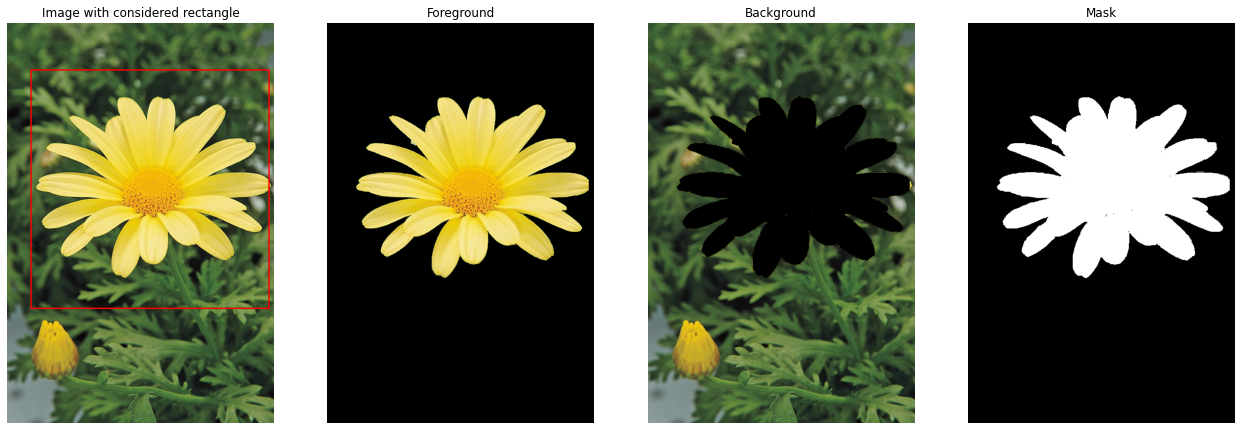

In [63]:
im = cv.imread(r'daisy.jpg')
orig = cv.imread(r'daisy.jpg')
orig = cv.cvtColor(orig, cv.COLOR_BGR2RGB)
mask = np.zeros(im.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,100,500,500)
cv.grabCut(im,mask,rect,bgdModel,fgdModel,3,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
FG = im*mask2[:,:,np.newaxis]
BG = np.subtract(im,FG)
area = cv.rectangle(orig,(50,100),(550,600),(255,0,0),2)

GrabCut uses image segmentation based on graph cuts to separate the required image. Here, when we give the range of the pixels in the object we want to extract, it separates that image from the background reasonably accurately.

**Q7(b)**

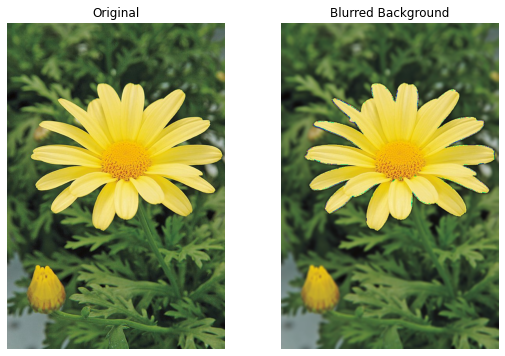

In [64]:
sigma = 4
BG_gauss = cv.GaussianBlur(BG,(7,7),sigma)
blurred_im= np.add(FG,BG_gauss)

**Q7(c)**

The GrabCut algorithm we are using here detect edges in places where no boundaries are available. Some of the pixels that should be seen as the background have been caught as the foreground. So when we are enhancing the foreground, these erroneous pixels make the pixels beyond the edges darker.